In [99]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv")
print(data)

                                                    Text  language
0      klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1      sebes joseph pereira thomas  på eng the jesuit...   Swedish
2      ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3      விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4      de spons behoort tot het geslacht haliclona en...     Dutch
...                                                  ...       ...
21995  hors du terrain les années  et  sont des année...    French
21996  ใน พศ  หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...      Thai
21997  con motivo de la celebración del septuagésimoq...   Spanish
21998  年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...   Chinese
21999   aprilie sonda spațială messenger a nasa și-a ...  Romanian

[22000 rows x 2 columns]


In [100]:
langs = np.unique(data['language'])

In [101]:
x = np.array(data["Text"])
y = np.array(data["language"])
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state=42)

In [102]:

model = MultinomialNB()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.953168044077135

['Latin']


<AxesSubplot:>

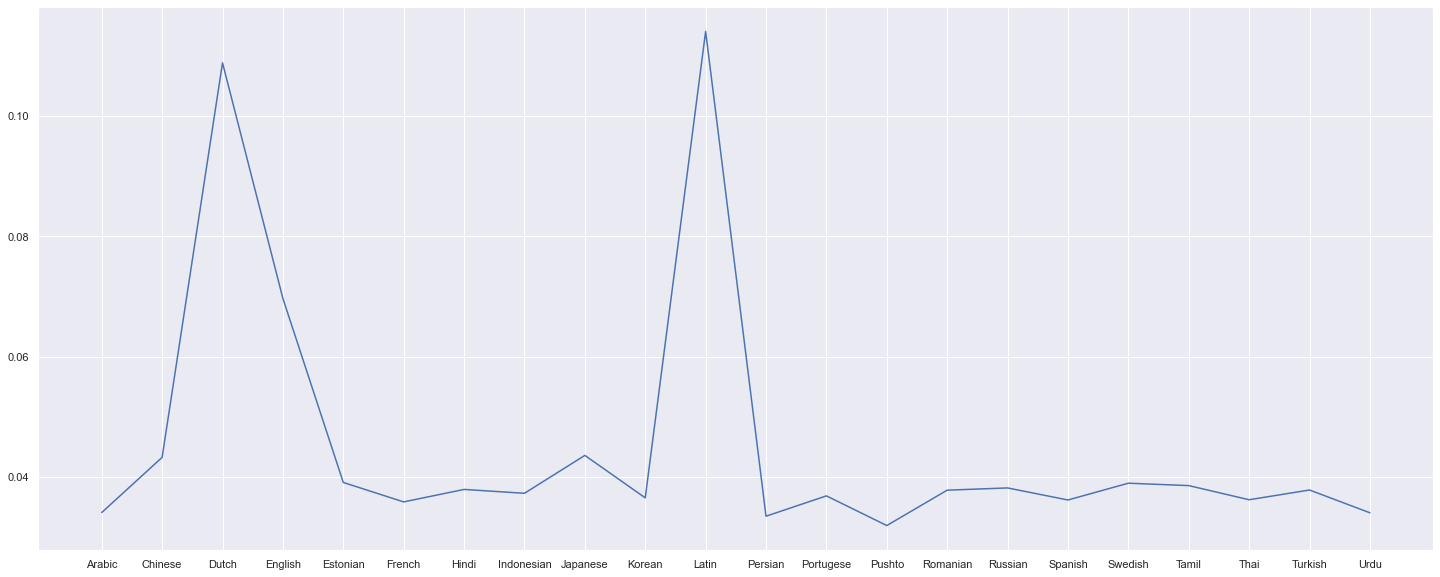

In [103]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
probs=model.predict_proba(data)
probs=probs.flatten()
print(output)
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
sns.lineplot(x=langs, y=probs)

